In [1]:
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [2]:
def read_dataset(path):
    data = input_data.read_data_sets(path)
    x_train = np.array([x.reshape(28,28) for x in data.train.images])
    y_train = data.train.labels
    x_test = np.array([x.reshape(28,28) for x in data.test.images])
    y_test = data.test.labels
    print("x_train shape: " + str(x_train.shape))
    print("y_train size: " + str(len(y_train)))
    print("diff classes: " + str(len(set(y_train))))
    print("")
    print("x_test shape: " + str(x_test.shape))
    print("y_test size: " + str(len(y_test)))
    print("y_test classes: " + str(len(set(y_test))))
    
    return x_train, y_train, x_test, y_test

print("ORIGIN")
origin = read_dataset('data/origin/')
print("FASHION")
fashion = read_dataset('data/fashion/')

ORIGIN
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/origin/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/origin/train-labels-idx1-ubyte.gz
Extracting data/origin/t10k-images-idx3-ubyte.gz
Extracting data/origin/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
x_train shape: (55000, 28, 28)
y_train size: 55000
diff classes: 10

x_test shape: (10000, 28, 28)
y_test size: 10000
y_test classes: 10
FASHION
Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
x_tr

In [3]:
def print_img(img):
    pixels = img.reshape((28, 28))
    plt.imshow(pixels)
    plt.show()
    
def print_imgs(imgs, labels):
    for i in range(len(imgs)):
        plt.subplot(int(len(imgs)/5), 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(imgs[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()

ORIGIN


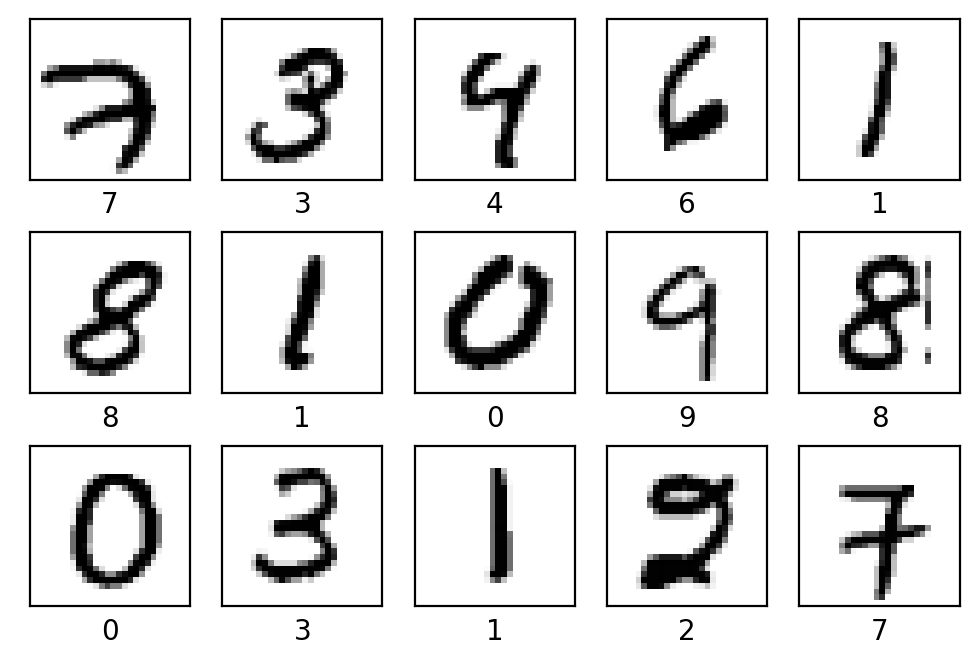

FASHION


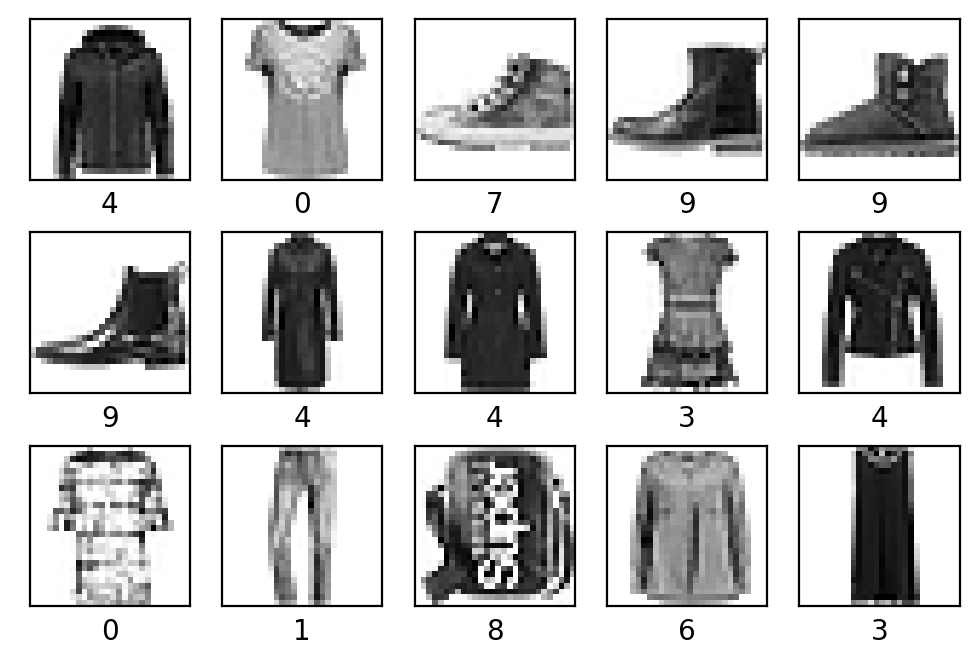

In [4]:
print("ORIGIN")
print_imgs(origin[0][0:15], origin[1][0:15])
print("FASHION")
print_imgs(fashion[0][0:15], fashion[1][0:15])


In [5]:
def build_model(layers_count, p, sq_size, class_count, show):
    model = models.Sequential()
    model.add(layers.Conv2D(2 ** p, (sq_size, sq_size), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    cur_p = p
    for i in range(0, layers_count):
        cur_p += 1  
        model.add(layers.Conv2D(2 ** cur_p, (sq_size, sq_size), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(class_count))
    model.add(layers.Activation("softmax"))
    if show:
        print(model.summary())
    return model

In [6]:
def compile_model(model):
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer="adam", metrics=["accuracy"])
    
def add_channel(data):
    return data.reshape(list(data.shape) + [1])

def train_model(model, train_x, train_y, test_x, test_y):
    history = model.fit(train_x, train_y, epochs=1,
                    validation_data=(test_x, test_y), batch_size = 32)
    return history

def print_result(history):
    print("train set accuracy:")
    print(history.history['acc'])
    print("test set accuracy")
    print(history.history['val_acc'])
    
def calc(train_x, train_y, test_x, test_y, arch):
    model = build_model(*arch, len(set(train_y)), True)
    compile_model(model)
    history = train_model(model, add_channel(train_x), train_y, add_channel(test_x), test_y)
    print_result(history)
    return model

def print_arch(layers, p, sq_size):
    print("count of hidden layer pairs of conv+pool:")
    print(layers)
    print("starting power of 2 of filters count in conv layer:")
    print(p)
    print("size of conv layer filter:")
    print(sq_size)

In [7]:
def find_best_arch(train_x, train_y, test_x, test_y):
    best_test_acc = -1
    best_layers = 0
    best_p = 0
    best_sq_size = 0
    best_model = 0
    for layers in range(0, 3):
        for p in range(3, 7):
            for sq_size in range(1, 4):
                print_arch(layers, p, sq_size)
                model = build_model(layers, p, sq_size, len(set(train_y)), False)
                compile_model(model)
                history = train_model(model, add_channel(train_x), train_y, add_channel(test_x), test_y)
                print_result(history)
                print("-----------------------------")
                cur_acc = history.history["val_acc"][0]
                if cur_acc > best_test_acc:
                    best_test_acc = cur_acc
                    best_layers = layers
                    best_p = p
                    best_model = model
                    best_sq_size = sq_size
    return best_layers, best_p, best_sq_size, best_model, best_test_acc
                

In [8]:
best_arch = find_best_arch(*origin)

count of hidden layer pairs of conv+pool:
0
starting power of 2 of filters count in conv layer:
3
size of conv layer filter:
1
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 55000 samples, validate on 10000 samples
55000/55000 [==============================] - 8s 153us/sample - loss: 0.5267 - acc: 0.8602 - val_loss: 0.3177 - val_acc: 0.9096
train set accuracy:
[0.8602]
test set accuracy
[0.9096]
-----------------------------
count of hidden layer pairs of conv+pool:
0
starting power of 2 of filters count in conv layer:
3
size of conv layer filter:
2
Train on 55000 samples, validate on 10000 samples
55000/55000 [==============================] - 12s 217us/sample - loss: 0.3641 - acc: 0.8980 - val_loss: 0.1986 - val_acc: 0.9449
train set accuracy:
[0.89796364]
test set accuracy
[0.9449]
-----------------------------
count of hidden layer pairs of conv+pool:
0
starting power of 2 of filters count in conv laye

train set accuracy:
[0.9390182]
test set accuracy
[0.9752]
-----------------------------
count of hidden layer pairs of conv+pool:
1
starting power of 2 of filters count in conv layer:
5
size of conv layer filter:
3
Train on 55000 samples, validate on 10000 samples
55000/55000 [==============================] - 43s 785us/sample - loss: 0.1671 - acc: 0.9480 - val_loss: 0.0585 - val_acc: 0.9813
train set accuracy:
[0.948]
test set accuracy
[0.9813]
-----------------------------
count of hidden layer pairs of conv+pool:
1
starting power of 2 of filters count in conv layer:
6
size of conv layer filter:
1
Train on 55000 samples, validate on 10000 samples
55000/55000 [==============================] - 63s 1ms/sample - loss: 0.5399 - acc: 0.8291 - val_loss: 0.4466 - val_acc: 0.8530
train set accuracy:
[0.82914543]
test set accuracy
[0.853]
-----------------------------
count of hidden layer pairs of conv+pool:
1
starting power of 2 of filters count in conv layer:
6
size of conv layer filter:


In [9]:
print_arch(*best_arch[0:3])
print("Accuracy: ")
print(best_arch[4])
best_arch[3].summary()

count of hidden layer pairs of conv+pool:
1
starting power of 2 of filters count in conv layer:
6
size of conv layer filter:
3
Accuracy: 
0.983
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)  

In [10]:
fashion_model = calc(*fashion, best_arch[0:3])

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_36 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                32010     
_________________________________________________________________
activation_36 (Activation)   (None, 10)              

In [11]:
predictions = fashion_model.predict(add_channel(fashion[2]))
test_y = fashion[3]
pred_y = np.argmax(predictions, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_y, pred_y))

Confusion Matrix
[[818   0  11  21   4   1 134   0  11   0]
 [  2 967   0  18   3   0   8   0   2   0]
 [ 14   0 831   5  48   0  97   0   5   0]
 [ 17   3  13 847  37   0  80   0   3   0]
 [  1   0  91  23 684   0 198   0   3   0]
 [  0   0   0   1   0 940   1  47   1  10]
 [131   1  73  13  58   0 698   0  26   0]
 [  0   0   0   0   0   6   0 942   1  51]
 [  1   1   3   4   2   1   7   4 977   0]
 [  0   0   0   0   0   6   0  27   1 966]]


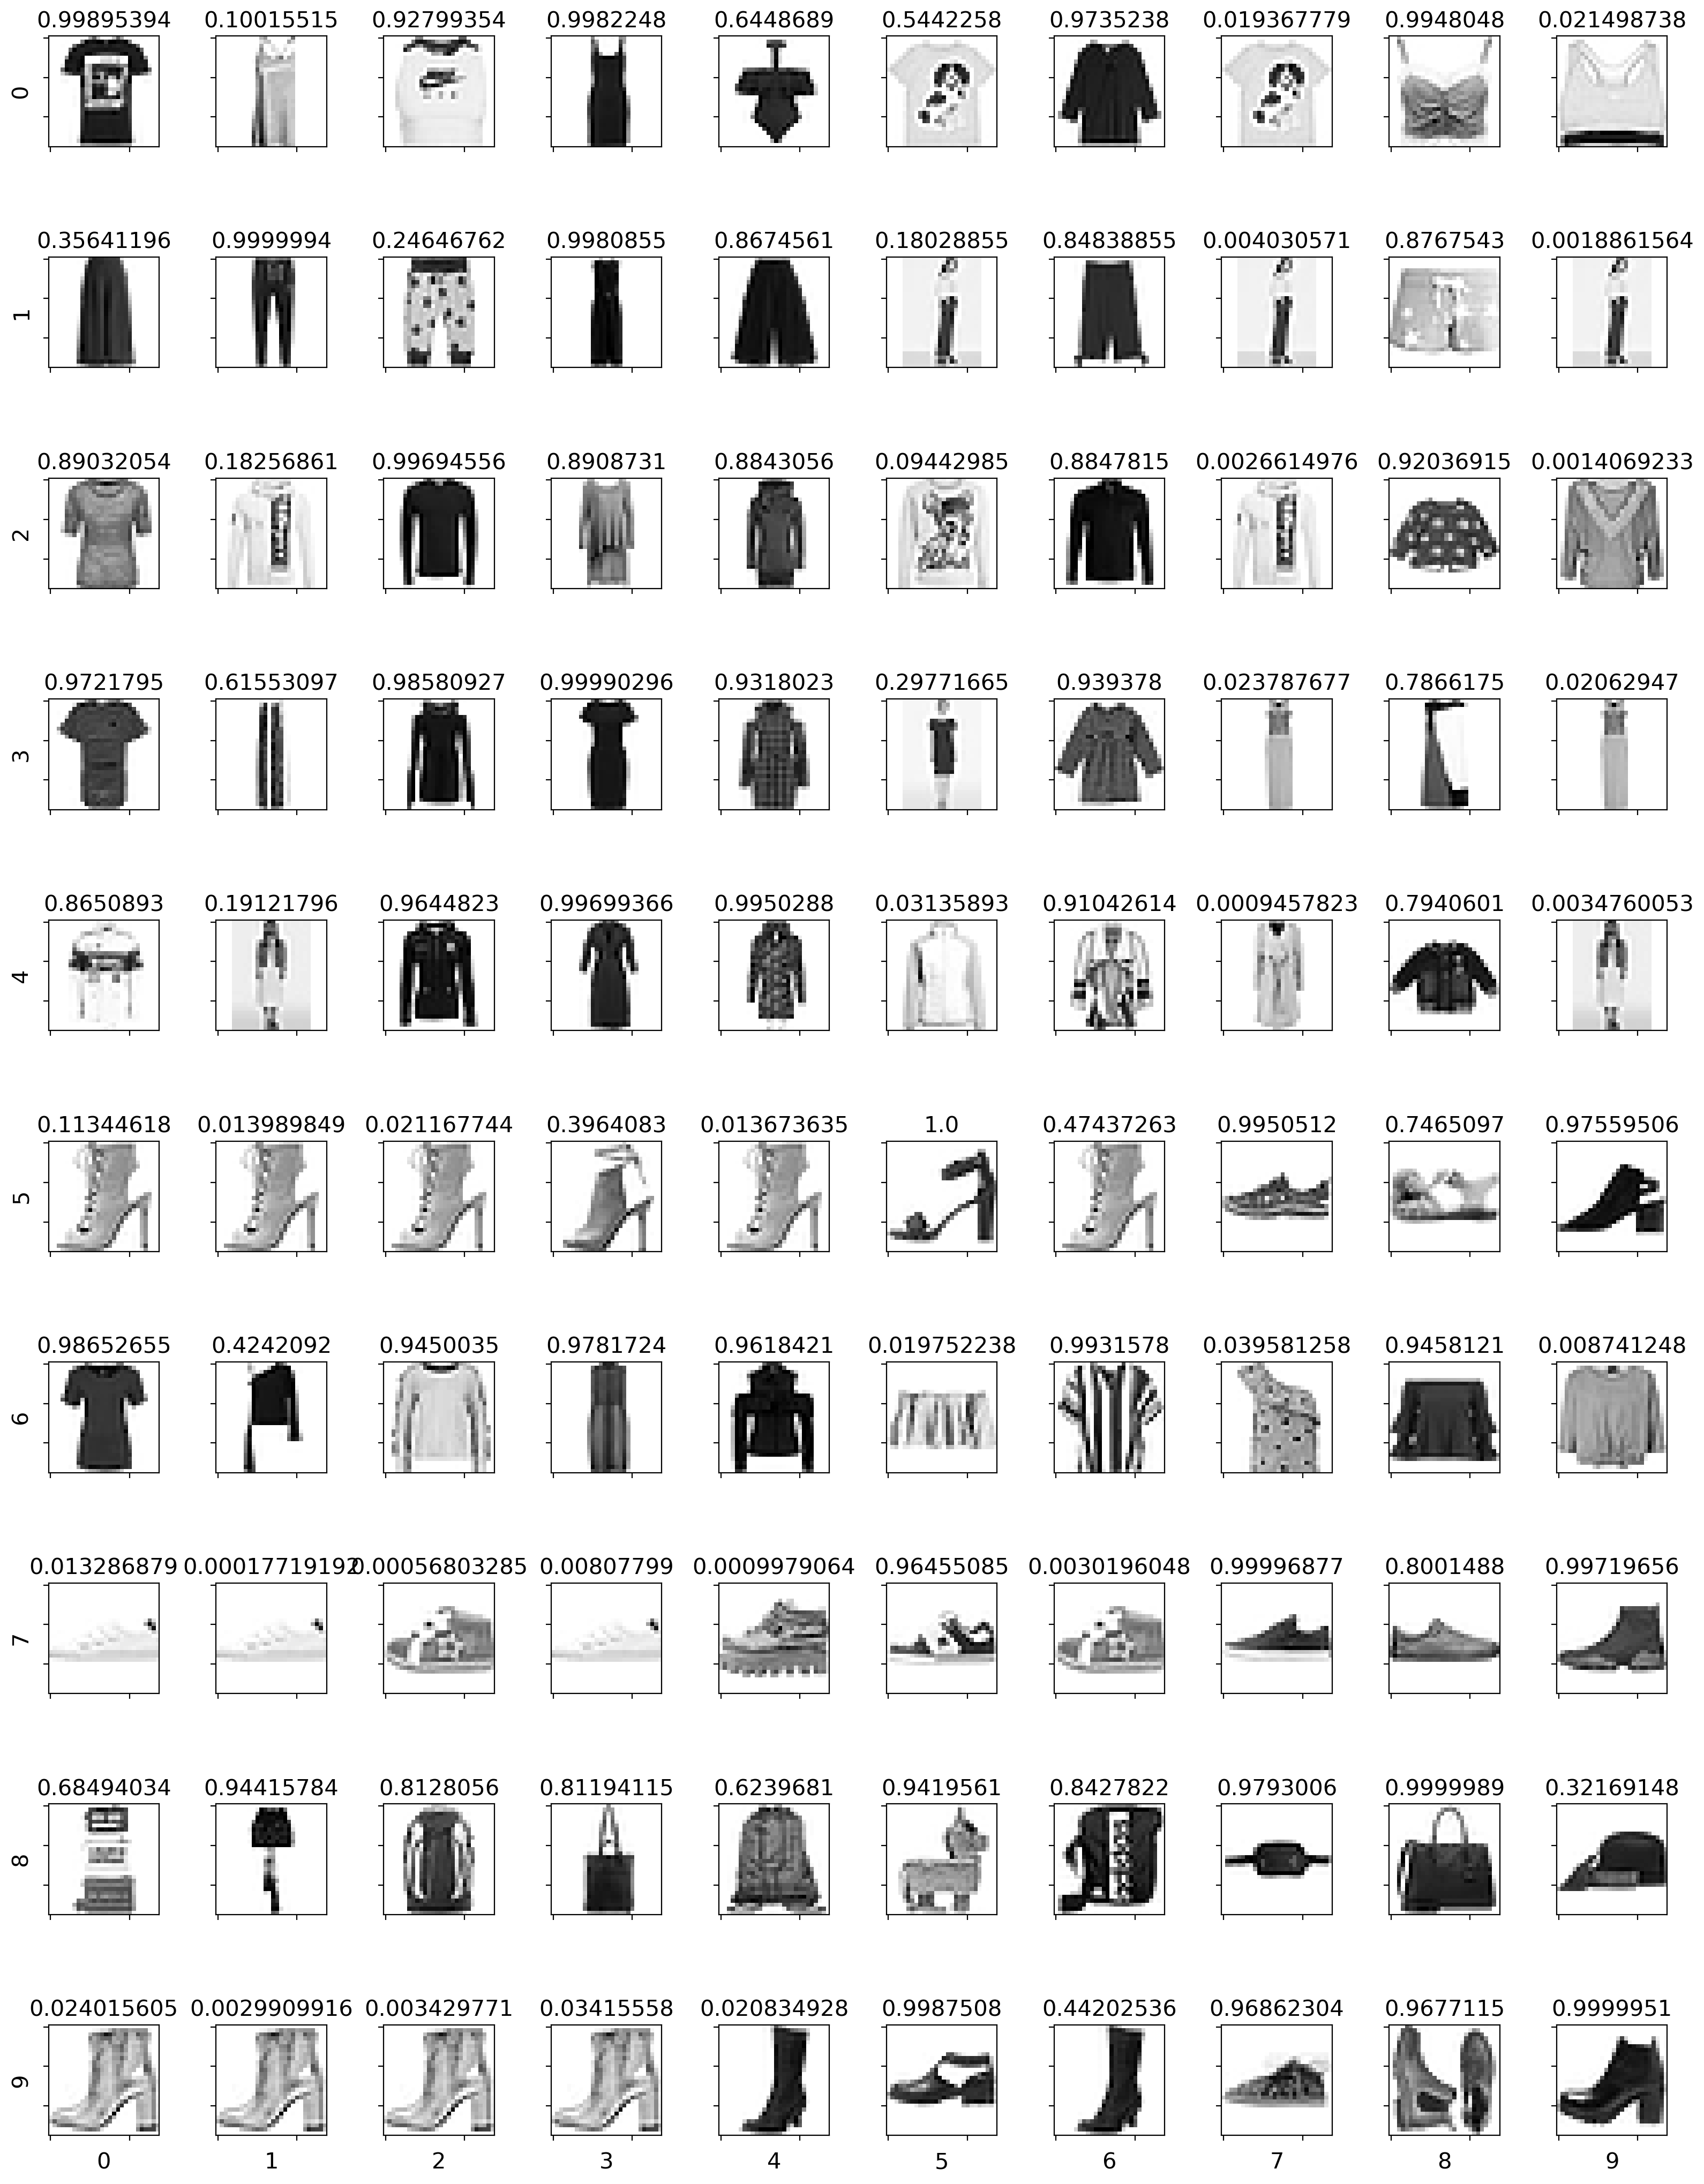

In [12]:
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

classes_range = range(0, len(set(test_y)))
image_id_matrix = [[[0, -1] for _ in classes_range] for _ in classes_range]
for pred_i in range(0, len(predictions)):
    pred_v = predictions[pred_i]
    label = test_y[pred_i]
    for cl_id in range(len(pred_v)):
        if image_id_matrix[label][cl_id][0] < pred_v[cl_id]:
            image_id_matrix[label][cl_id][0] = pred_v[cl_id]
            image_id_matrix[label][cl_id][1] = pred_i 

fig, axs = plt.subplots(10, 10, figsize=(20, 20))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.0, wspace=0.1)
for i in range(len(image_id_matrix)):
    for j in range(len(image_id_matrix[0])):
        axs[i,j].set_yticklabels([])
        axs[i,j].set_xticklabels([])
        axs[i,j].imshow(fashion[2][image_id_matrix[i][j][1]], cmap=plt.cm.binary)
        axs[i,j].set_title(image_id_matrix[i][j][0], fontsize = 15)
for i in range(len(axs.flat)):
    axs.flat[i].set_ylabel(int(i/10), fontsize = 15)
    axs.flat[i].set_xlabel(int(i % 10), fontsize = 15)
for ax in axs.flat:
    ax.label_outer()
plt.show()